# Mapping the geographical extent of mobile data reach

In [23]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
states_url = 'http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_5m.json'
#states_url = 'http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_500k.json'
states_gdf = gpd.read_file(states_url)

In [37]:
# Reproject to UTM Zone 11N
states_gdf.to_crs('EPSG:26911')

# Limit to lower 48 states
idx = states_gdf['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico', 'Guam', 'Virgin Islands', 'American Samoa', 'Northern Mariana Islands'])
states_gdf = states_gdf[~idx]

In [49]:
# Define lat/longs of the specific cities in Spectus data
cities = gpd.GeoDataFrame({
    'city': ['Fresno', 'Sebring', 'Tyler', 'Cheyenne', 'Tulsa', 'New York', 'Los Angeles', 'Seattle', 'Baltimore', 'Boston', 'Champaign'], 
    'state': ['CA', 'FL', 'TX', 'WY', 'OK', 'NY', 'CA', 'WA', 'MD', 'MA', 'IL'], 
    'lat': [36.7468, 27.4956, 32.3513, 41.1400, 36.1539, 40.7128, 34.0522, 47.6062, 39.2904, 42.3601, 40.1164], 
    'long': [-119.7726, -81.4409, -95.3011, -104.8202, -95.9928, -74.0060, -118.2437, -122.3321, -76.6122, -71.0589, -88.2434]
}, geometry=gpd.points_from_xy(cities.long, cities.lat))

In [50]:
cities.crs = {'init': 'epsg:4326'}

C:\Users\ekino\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


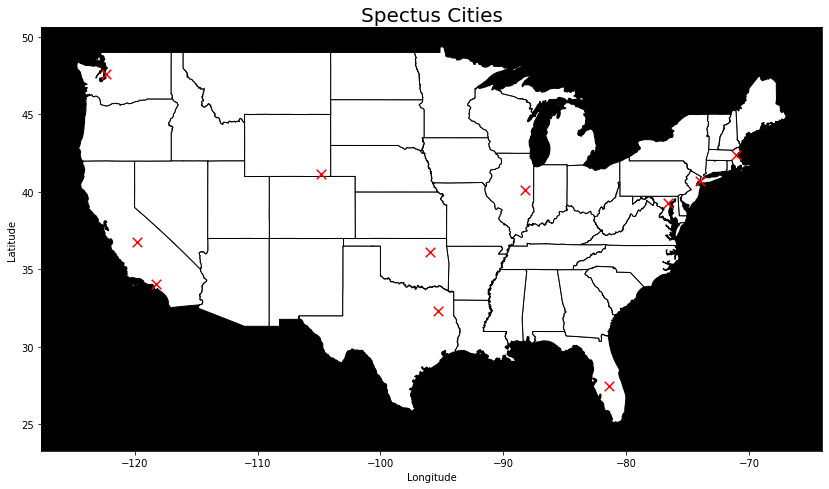

In [65]:
f, ax = plt.subplots(figsize=(14, 10))
states_gdf.plot(ax=ax, facecolor='white', edgecolor='k')
cities.plot(ax=ax, marker='x', color='red', markersize=90)

plt.title('Spectus Cities')

# Set axis titles
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Make title font larger
ax.title.set_fontsize(20)

# Give dark background to plot
ax.set_facecolor('black')